# Linear Buckling Analysis of a 3D solid {far}`star`{far}`star`


```{admonition} Objectives
:class: objectives

In this numerical tour, we will demonstrate how to compute the buckling modes of a three-dimensional elastic solid under a conservative loading. The critical buckling loads and buckling modes are obtained by solving a generalized Hermitian eigenvalue problem using `slepc4py`.$\newcommand{\bq}{\boldsymbol{q}}
\newcommand{\bu}{\boldsymbol{u}}
\newcommand{\bv}{\boldsymbol{v}}
\newcommand{\bt}{\boldsymbol{t}}
\newcommand{\be}{\boldsymbol{e}}
\newcommand{\beps}{\boldsymbol{\varepsilon}}
\newcommand{\bsig}{\boldsymbol{\sigma}}
\newcommand{\T}{^{\text{T}}}$
```

```{image} eigenmodes_cross.gif
:width: 600px
:align: center
```

```{admonition} Coauthors
:class: coauthors

This tour has been written with the help of:
* Maxime Pierre (Ecole des Ponts ParisTech, maxime.pierre@enpc.fr)
```

```{admonition} Download sources
:class: download

* {Download}`Python script<./buckling_3d_solid.py>`
* {Download}`Jupyter notebook<./buckling_3d_solid.ipynb>`
* {Download}`Complete sources files<./buckling_3d_solid.zip>`
```

## Geometrically Nonlinear Elasticity

To formulate the buckling problem, we must consider a general geometrically nonlinear framework. More precisely, we will consider the case of small-strain/large displacements that are expected in typical buckling analysis. For more details on the theoretical formulation, the reader can refer to {cite:p}`nguyen2000stability`.

We consider the Green-Lagrange strain tensor $\be$ defined as:

$$e_{ij}  = \frac{1}{2} (u_{i,j} + u_{j,i}) + \frac{1}{2} u_{k,i}u_{k,j}$$

which can also be written in tensor format as:

$$ \be = \beps(\bu) + \dfrac{1}{2}\bq(\bu, \bu) $$

where we isolate the linearized strain $\beps(\bu)=\frac{1}{2} (\nabla\bu+\nabla\bu\T)$ and nonlinear quadratic part $\bq(\bu, \bu)=\nabla\bu\T\nabla\bu$.

Since we restrict to a small strain assumption, we adopt a standard linear Hookean behavior for the material model (aka Saint-Venant Kirchhoff model) which can be described by the following quadratic elastic energy density:

$$ \psi(\be) = \dfrac{1}{2}\be:\mathbb{C}: \be $$

where $\mathbb{C}$ is the elastic moduli tensor.

We seek to find the underlying equilibrium displacement field $\bu$ as a function of a scalar loading parameter $\lambda$ under a set of prescribed external surface forces $\bt(\lambda)$.

## Equilibrium and stability conditions
Let us consider the total potential energy functional:

$$ \mathcal{E}_\text{pot}(\bu;\lambda) = \int_\Omega \psi(\be(\bu)) d\Omega - \int_{\Gamma_N} \bt(\lambda) \cdot \bu dS $$

The equilibrium equations are obtained from the first variation which must vanish:

$$ \partial_u\mathcal{E}_\text{pot}[\delta\bu] = \int_\Omega \be(\bu):\mathbb{C}:\delta\be[\delta\bu] d\Omega - \int_{\Gamma_N} \bt(\lambda) \cdot \delta\bu dS $$

where $\delta\bu$ is any kinematically admissible perturbation direction and where:

$$
\delta\be[\delta\bu] = \beps(\delta\bu) + \nabla\bu\T\nabla\delta\bu = \beps(\delta\bu) + \bq(\bu,\delta\bu)
$$

The stability conditions of an equilibrium are obtained from the Lejeune-Dirichlet theorem stating that the energy second variation must be positive. Here the second variation bilinear form is given by:

$$ \partial_{uu}\mathcal{E}_\text{pot}[\delta\bu,\delta \bv] = \int_\Omega (\delta \be[\delta\bv]:\mathbb{C}:\delta\be[\delta\bu] + \be:\mathbb{C}:\delta^2\be[\delta\bu,\delta\bv] )d\Omega $$

where:

$$
\delta^2\be[\delta\bu,\delta\bv] = \delta\bq(\bu,\delta \bu)[\delta\bv] = \nabla \delta\bv\T\nabla\delta\bu = \bq(\delta\bv,\delta\bu)
$$

## Bifurcation point

A given equilibrium solution $\lambda^c, \bu^c=\bu(\lambda^c)$ is a bifurcation point if the second variation vanishes for some $\delta\bu$. $\lambda^c$ defines the bifurcation load and $\delta\bu$ the bifurcation mode. Hence, we have:

```{math}
:label: bifurcation-equilibrium

\int_\Omega ((\beps(\delta\bv) + \bq(\bu^c,\delta\bv)):\mathbb{C}:(\beps(\delta\bu) + \bq(\bu^c,\delta\bu)) + \be(\bu^c):\mathbb{C}:\bq(\delta\bv,\delta\bu))d\Omega = 0
```

## Linear buckling analysis

When performing a linear buckling analysis, we look for bifurcation points on the fundamental equilibrium branch obtained by a small displacement assumption. As a result, in the above bifurcation equation the quadratic contribution in the first term can be neglected and the Green-Lagrange strain $\be(\bu^c)$ can be replaced by the linearized strain $\beps(\bu^c)$ in the second term. Besides, in the small-displacement assumption, if the loading depends linearly on the load parameter $\lambda$, the small displacement solution also depends linearly on it. We therefore have $\bu^c= \lambda^c\bu_0$ and the bifurcation condition {eq}`bifurcation-equilibrium` becomes:

$$
\int_\Omega (\beps(\delta\bv):\mathbb{C}:\beps(\delta\bu)  + \lambda^c\beps(\bu_0):\mathbb{C}:\bq(\delta\bv,\delta\bu))d\Omega = 0
$$

After, introducing the initial pre-stress $\bsig_0 = \mathbb{C}:\beps(\bu_0)$, the last term can be rewritten as $\bsig_0:\bq(\delta\bv,\delta\bu) = (\nabla \delta \bv) \bsig_0 (\nabla \delta\bu)\T$ so that:

```{math}
:label: buckling-weak-form
\int_\Omega (\beps(\delta\bv):\mathbb{C}:\beps(\delta\bu)  + \lambda^c(\nabla \delta \bv) \bsig_0 (\nabla \delta\bu)\T)d\Omega = 0
```

We recognize here a linear eigenvalue problem where the first term corresponds to the classical linear elasticity bilinear form and the second term is an additional contribution depending on the pre-stressed state $\bu_0$. Transforming this variational problem into matrix notations yields:

$$
[\mathbf{K}]+\lambda[\mathbf{K}_G(\bu_0)]=0
$$

where $[\mathbf{K}]$ is the classical linear elastic stiffness matrix and $[\mathbf{K}_G(\bu_0)]$ the so-called *geometrical stiffness* matrix.

```{important}
In the present case, the geometric stiffness matrix is associated with a symmetric form. It is however indefinite, as the pre-stress can be positive or negative. In the case of follower forces i.e. forces for which the direction and/or intensity depends on the geometric configuration of the solid, typically pressure forces, such forces contribute to the geometric through an additional term which must be accounted for, see for instance {cite:p}`hibbit1979some`. In some particular cases, it may turn out that the resulting geometric stiffness matrix ends up being unsymmetric.
```

## FEniCSx implementation

### Defining the geometry

Here, we will consider a fully three dimensional beam-like structure with length $L = 1$ and of rectangular cross-section with height $h = 0.01$, and width $b = 0.03$.

In [1]:
import numpy as np
from mpi4py import MPI
from petsc4py import PETSc
from slepc4py import SLEPc
import ufl
from dolfinx import mesh, fem, plot, default_scalar_type
from dolfinx.fem.petsc import LinearProblem, assemble_matrix
from eigenvalue_solver import solve_GEP_shiftinvert, EPS_get_spectrum

L, b, h = 1, 0.01, 0.03
Nx, Ny, Nz = 50, 5, 5

domain = mesh.create_box(
    MPI.COMM_WORLD, [[0, 0, 0], [L, b, h]], [Nx, Ny, Nz], mesh.CellType.hexahedron
)

### Solving for the pre-stressed state $\bu_0$

We first need to compute the pre-stressed linear state $\bu_0$. It is obtained by solving a simple linear elasticity problem. The material is assumed here isotropic and we consider a pre-stressed state obtained from the application of a unit compression applied at the beam right end in the $X$ direction while the $Y$ and $Z$ displacement are fixed, mimicking a simple support condition. The beam is fully clamped on its left extremity.

In [2]:
E, nu = 1e3, 0.3

mu = fem.Constant(domain, default_scalar_type(E / 2 / (1 + nu)))
lmbda = fem.Constant(domain, default_scalar_type(E * nu / (1 + nu) / (1 - 2 * nu)))


def eps(v):
    return ufl.sym(ufl.grad(v))


def sigma(v):
    return lmbda * ufl.tr(eps(v)) * ufl.Identity(3) + 2 * mu * eps(v)


# Compute the linearized unit preload
N0 = 1
T = fem.Constant(domain, default_scalar_type((-N0, 0, 0)))
V = fem.FunctionSpace(domain, ufl.VectorElement("Lagrange", domain.ufl_cell(), 2))
v = ufl.TestFunction(V)
du = ufl.TrialFunction(V)


# Left and right ends of the beam
def left(x):
    return np.isclose(x[0], 0)


def right(x):
    return np.isclose(x[0], L)


# Dirichlet boundary conditions: Clamped and simply supported
fdim = domain.topology.dim - 1
left_facets = mesh.locate_entities_boundary(domain, fdim, left)
right_facets = mesh.locate_entities_boundary(domain, fdim, right)

u_L = np.array([0, 0, 0], dtype=default_scalar_type)
bcs = [
    fem.dirichletbc(u_L, fem.locate_dofs_topological(V, fdim, left_facets), V),
    fem.dirichletbc(
        default_scalar_type(0),
        fem.locate_dofs_topological(V.sub(1), fdim, right_facets),
        V.sub(1),
    ),
    fem.dirichletbc(
        default_scalar_type(0),
        fem.locate_dofs_topological(V.sub(2), fdim, right_facets),
        V.sub(2),
    ),
]

# Mark right facets for Neumann boundary condition application
facet_tag = mesh.meshtags(domain, fdim, right_facets, np.full_like(right_facets, 1))
ds = ufl.Measure("ds", domain=domain, subdomain_data=facet_tag)

# Linear Elasticity Bilinear Form
a = ufl.inner(sigma(du), eps(v)) * ufl.dx

# External loading on the right end
l = ufl.dot(T, v) * ds(1)

We will need the stiffness matrix in the linear buckling computation and hence we use `assemble_matrix` to assemble the matrix corresponding to our bilinear form in PETSc format. Note that we enforce a value of 1 on the diagonal at dofs corresponding to the Dirichlet boundary conditions.

In [3]:
# Solution of the trivial problem
problem = LinearProblem(
    a, l, bcs=bcs, petsc_options={"ksp_type": "preonly", "pc_type": "lu"}
)
u = problem.solve()

# Stiffness matrix
K = assemble_matrix(fem.form(a), bcs=bcs, diagonal=1)
K.assemble()

```{note}
The analysis above is not limited to problems subject to Neumann boundary conditions.
One can equivalently compute the prestress resulting from a displacement control simulation and the critical buckling load will correspond to the critical buckling displacement of the structure.
```

### Forming the geometric stiffness matrix and the buckling eigenvalue problem

From the previous solution, the prestressed state $\bsig_0$ entering the geometric stiffness matrix expression is simply given by `sigma(u)`. We also include directly the negative sign in the definition of the geometric stiffness form.

In contrast to the assembly of $\mathbf{K}$, we will put 0 on the diagonal of $\mathbf{K}_G$ in rows corresponding to boundary conditions. If we were to put 1 in both matrices, eigenvalues associated with the boundary conditions would be equal to 1 and would pollute the spectrum. By putting 0 in $\mathbf{K}_G$, they will be equal to infinity instead.

In [4]:
kgform = -ufl.inner(sigma(u), ufl.grad(du).T * ufl.grad(v)) * ufl.dx

KG = assemble_matrix(fem.form(kgform), bcs=bcs, diagonal=0)
KG.assemble()

After having formed the geometric stiffness matrix, we will use `slepc4py` to solve a generalized eigenvalue problem $\mathbf{Ax}=\lambda \mathbf{Bx}$ with here $\mathbf{A}=\mathbf{K}$ and $\mathbf{B}=-\mathbf{K}_G$. Function defined in {download}`eigenvalue_solver.py<./eigenvalue_solver.py>` allow to define the eigenvalue problem, set up parameters, monitor the resolution and extract the resulting eigenpairs. Here, our problem is of type `GHEP` (Generalized Hermitian eigenproblem).

```{tip}
We use a shift-and-invert transform i.e. instead of solving $\mathbf{Ax}=\lambda \mathbf{Bx}$, we will solve

$$
(\mathbf{A}-\sigma\mathbf{B})^{-1}\mathbf{Bx} =\zeta\mathbf{x}
$$

which has the same eigenvectors and for which the eigenvalues are

$$
\zeta = 1/(\lambda-\sigma),
$$

meaning that the eigenvalues $\zeta_i$ of largest magnitude correspond to the eigenvalues $\lambda_i$ closest to $\sigma$. Eigenvalues of large magnitude are easier to compute with a Krylov method, and thus the shift $\sigma$ should be chosen close to the eigenvalues we are trying to compute. Here, we will use a shift of 0.01, as the buckling points of interest are the smallest critical loads, i.e. the points corresponding to the smallest $\lambda_i$.
```

In [5]:
# Requested number of eigenvalues
N_eig = 6

# Solve eigenvalue problem
eigensolver = solve_GEP_shiftinvert(
    K,
    KG,
    problem_type=SLEPc.EPS.ProblemType.GHEP,
    solver=SLEPc.EPS.Type.KRYLOVSCHUR,
    nev=N_eig,
    tol=1e-12,
    shift=1e-2,
)

# Extract eigenpairs
(eigval, eigvec_r, eigvec_i) = EPS_get_spectrum(eigensolver, V)

******************************
***  SLEPc Iterations...   ***
******************************
Iter. | Conv. | Max. error
    1 |     3 | 2.7e-11

******************************
*** SLEPc Solution Results ***
******************************
Iteration number: 1
Converged eigenpairs: 3

Converged eigval.  Error 
----------------- -------
 1.68e-01             2.8e-13
 4.97e-01             9.6e-14
 9.88e-01             4.7e-14


### Validation against beam theory solution

Finally, we validate our implementation by comparing the buckling loads compared with a 3D model to those obtained from a Euler-Bernoulli beam model (see below). Note that we consider here the buckling modes around the weakest bending axis only which are the most critical with the chosen cross-section.

```{admonition} Beam theory buckling loads
:class: tip, dropdown
For a straight beam under uniform compression force $F_0$, the linearized bending equilibrium equation around the pre-stressed state reads:

$$M'(x)+\lambda F_0\theta(x) + Q(x)=0$$

where $\theta(x)=v'(x)$ is the beam rotation, $v(x)$ the beam vertical deflection and $Q(x)$ the shear force. Here, $Q(x)=\text{cte}$. Thus injecting the linear elastic relation $M(x)=EIv''(x)$ and differentiating one, one obtains:

$$
EI v^{(4)}(x)+\lambda F_0v''(x)=0
$$

Introducing $k^2 = \lambda F_0/EI$, the general solution is of the form:

$$v(x) = A\cos(kx)+B\sin(kx)+Cx+D$$

For the present problem of clamped-pinned supports, we have for the boundary conditions:

$$
\begin{align*}
v(0) = 0 &\Rightarrow A+D=0\\
v'(0) = 0 &\Rightarrow Bk+C=0\\
v(L)=0 &\Rightarrow A\cos(kL)+B\sin(kL)+CL+D=0\\
v''(L)=0 &\Rightarrow A\cos(kL)+B\sin(kL)=0
\end{align*}
$$

that is:

$$
\begin{align*}
A(\cos(kL)-1)+B(\sin(kL)-kL) &= 0\\
A\cos(kL)+B\sin(kL) &=0
\end{align*}
$$

A non-trivial solution is obtained if the determinant of the above system is zero, that is:
\begin{gather*}
(\cos(kL)-1)\sin(kL)-\cos(kL)(\sin(kL)-kL)=0
\\ \boxed{\tan(kL)=kL}
\end{gather*}

Solutions to the transcendental equation $\tan(\alpha)=\alpha$ where $\alpha=kL$ are approximately given by:

$$
\alpha_1 \approx 1.4303\pi,\quad \alpha_2 \approx 2.4509\pi,\quad \alpha_3 \approx 3.4709\pi,\quad \alpha_n \approx \left(n + \frac{1}{2}\right)\pi
$$

Finally, the buckling load are given by:

$$
\lambda_n F_0 = \alpha_n^2\dfrac{EI}{L^2}
$$
```

In [6]:
# Analytical beam theory solution
# F_cr,n = alpha_n^2*EI/L^2
# where alpha_n are solutions to tan(alpha) = alpha
alpha = np.array([1.4303, 2.4509, 3.4709] + [(n + 1 / 2) for n in range(4, 10)]) * np.pi
I = b**3 * h / 12
S = b * h

for i in range(N_eig):
    critical_load_an = alpha[i] ** 2 * float(E * I / N0 / S) / L**2
    print(
        f"Critical load factor {i+1}: {eigval[i].real:.5f} FE | {critical_load_an:.5f} Beam"
    )

Critical load factor 1: 0.16818 FE | 0.16826 Beam
Critical load factor 2: 0.49671 FE | 0.49405 Beam
Critical load factor 3: 0.98842 FE | 0.99084 Beam


We can see that the computed 3D buckling loads are vey close to the analytical solution of the beam theory. This is further confirmed when plotting the computed eigenmodes with `pyvista`.

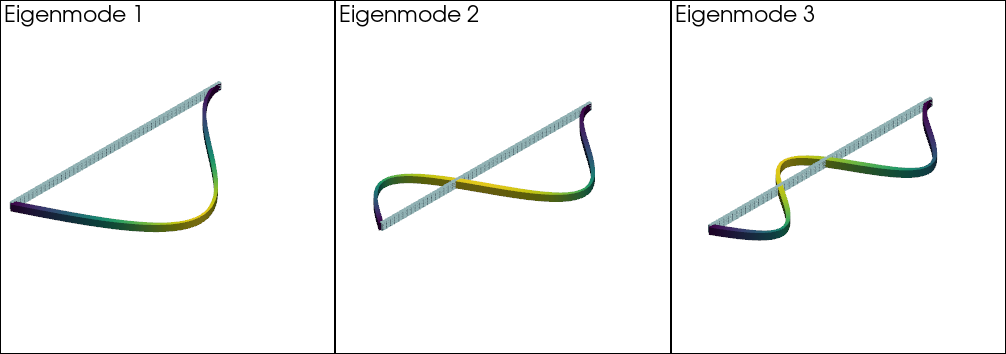

In [7]:
import pyvista

pyvista.set_jupyter_backend("static")

# Grid for the mesh
tdim = domain.topology.dim
mesh_topology, mesh_cell_types, mesh_geometry = plot.vtk_mesh(domain, tdim)
mesh_grid = pyvista.UnstructuredGrid(mesh_topology, mesh_cell_types, mesh_geometry)

# Grid for functions (2nd order elements)
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(V)
u_grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)

# Plot the first 3 eigenmodes
pl = pyvista.Plotter(shape=(2, 3))
for i in range(6):
    pl.subplot(i // 3, i % 3)
    eigenmode = f"eigenmode_{i:02}"
    pl.add_text(
        f"Eigenmode {i+1}",
        font_size=12,
    )
    eigen_vector = eigvec_r[i]
    u_grid[eigenmode] = eigen_vector.x.array.reshape(
        u_geometry.shape[0], V.dofmap.index_map_bs
    )
    pl.add_mesh(mesh_grid, style="wireframe")
    pl.add_mesh(u_grid.warp_by_vector(eigenmode, factor=0.02), show_scalar_bar=False)
pl.view_isometric()
pl.show()

## References

```{bibliography}
:filter: docname in docnames
```